In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
import numpy as np


CARREGO A BASE DE DADOS E SEPARO OS PROVISORES DA CLASSE

In [2]:
base = datasets.load_iris()
previsores = base.data
classe = base.target
classe

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Transformando os rótulos das classes em representação one-hot encoding

In [3]:
classe_dummy = to_categorical(classe)
classe_dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

Criando treinamento

In [4]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, classe_dummy, test_size=0.3, random_state=0)

Normalizar os dados do treinamento

In [5]:
# Normalização dos dados
scaler = StandardScaler()
x_treinamento = scaler.fit_transform(x_treinamento)
x_teste = scaler.transform(x_teste)

Criação da estrutura da rede neural com classe Sequencial

In [6]:
modelo = Sequential()
#Primeira camada oculta 5 neurônios e 4 neurônios de entrada
modelo.add(Input(shape=(4,)))   # Forma de entrada com 4 características
#Adicionando camada densa
modelo.add(Dense(units=5, activation='relu'))
Dropout(0.2)
#Segunda camada oculta
modelo.add(Dense(units=4, activation='relu'))
Dropout(0.2)
#Terceira camada oculta
#Softmax por termos um problema com mais de duas classes
modelo.add(Dense(units=3, activation= "softmax"))

#Visualizar os dados da rede

In [7]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

Compilar e treinar o modelo

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
modelo.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
#Treinamento
modelo.fit(x_treinamento, y_treinamento, epochs= 100, validation_data= (x_teste, y_teste), verbose=2, callbacks=[early_stopping])

Epoch 1/100
4/4 - 0s - 42ms/step - accuracy: 0.9810 - loss: 0.1183 - val_accuracy: 0.9778 - val_loss: 0.1565
Epoch 2/100
4/4 - 0s - 45ms/step - accuracy: 0.9810 - loss: 0.1175 - val_accuracy: 0.9778 - val_loss: 0.1546
Epoch 3/100
4/4 - 0s - 29ms/step - accuracy: 0.9810 - loss: 0.1167 - val_accuracy: 0.9778 - val_loss: 0.1533
Epoch 4/100
4/4 - 0s - 29ms/step - accuracy: 0.9810 - loss: 0.1160 - val_accuracy: 0.9778 - val_loss: 0.1524
Epoch 5/100
4/4 - 0s - 31ms/step - accuracy: 0.9810 - loss: 0.1152 - val_accuracy: 0.9778 - val_loss: 0.1518
Epoch 6/100
4/4 - 0s - 31ms/step - accuracy: 0.9810 - loss: 0.1144 - val_accuracy: 0.9778 - val_loss: 0.1510
Epoch 7/100
4/4 - 0s - 31ms/step - accuracy: 0.9810 - loss: 0.1136 - val_accuracy: 0.9778 - val_loss: 0.1494
Epoch 8/100
4/4 - 0s - 36ms/step - accuracy: 0.9810 - loss: 0.1130 - val_accuracy: 0.9778 - val_loss: 0.1479
Epoch 9/100
4/4 - 0s - 38ms/step - accuracy: 0.9810 - loss: 0.1123 - val_accuracy: 0.9778 - val_loss: 0.1469
Epoch 10/100
4/4 - 

In [11]:
previsoes = modelo.predict(x_teste)

# Converte para o índice da classe com maior probabilidade
y_previsoes_matrix = np.argmax(previsoes, axis=1)

# Extrai os valores originais das classes de teste
y_teste_matrix = np.argmax(y_teste, axis=1)

y_previsoes_matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [12]:
y_teste_matrix = [np.argmax(t) for t in y_teste]
y_previsoes_matrix = [np.argmax(t) for t in previsoes]

Relatório de desempenho

In [13]:
acerto = accuracy_score(y_teste_matrix, y_previsoes_matrix)

print("\nAccuracy:")
print(acerto)
print("\nF1-Score:")
print(f1_score(y_teste_matrix, y_previsoes_matrix, average='weighted'))
print("\nRelatório de Classificação:")
print(classification_report(y_teste_matrix, y_previsoes_matrix))



Accuracy:
0.9777777777777777

F1-Score:
0.9779434092477569

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Matriz de confusao

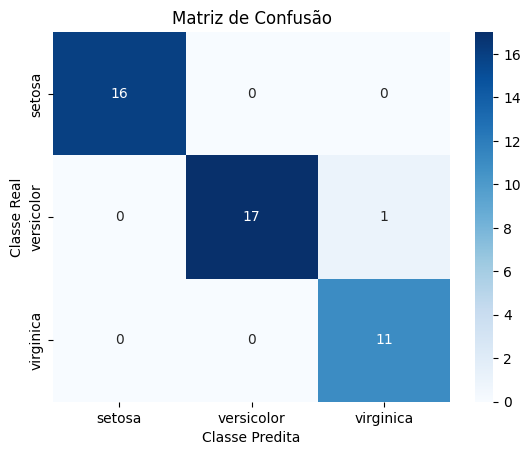

In [14]:
# Matriz de confusão
confusao = confusion_matrix(y_teste_matrix, y_previsoes_matrix)

sns.heatmap(confusao, annot=True, fmt="d", cmap="Blues", xticklabels=base.target_names, yticklabels=base.target_names)
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão")
plt.show()